We will now analyse Logistic Regression  model and compare it's performance against the Multinomial Naive Bayes Classifier

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving twitter_train.csv to twitter_train (2).csv


In [4]:
df=pd.read_csv("twitter_train.csv")

In [5]:
df['length']=df['tweet'].apply(len)
df['length']

0        102
1        122
2         21
3         86
4         39
        ... 
31957     68
31958    131
31959     63
31960     67
31961     32
Name: length, Length: 31962, dtype: int64

In [6]:
positive=df[df['label']==0]
negative=df[df['label']==1]

In [7]:
import string 
import nltk 
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def text_cleaning(sentence):
    sentence_punc_removed=[letter for letter in sentence if letter not in string.punctuation]
    sentence_punc_removed=''.join(sentence_punc_removed)
    sentence_clean=[word for word in sentence_punc_removed.split() if word.lower() not in stopwords.words('english')]
    return sentence_clean

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
tweets_vectorizer=CountVectorizer(analyzer=text_cleaning,dtype='uint8').fit_transform(df['tweet'])

In [10]:
X=tweets_vectorizer.toarray()
y=df['label']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred=logreg.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix , classification_report

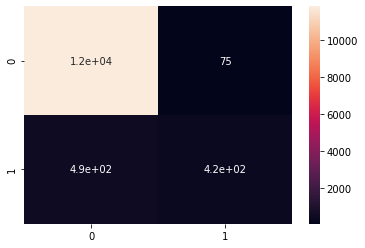

In [16]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [17]:
print(confusion_matrix(y_test,y_pred))

[[11804    75]
 [  488   418]]


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     11879
           1       0.85      0.46      0.60       906

    accuracy                           0.96     12785
   macro avg       0.90      0.73      0.79     12785
weighted avg       0.95      0.96      0.95     12785



In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9559640203363317

We can observe that the number of false positives for Logistic Regression(75) is significantly lower than that of Multionomial NB(220) and however the number of true negatives of Multionomial NB(11659) is lower than Logistic Regression(11804)
So , in conclusion Logistic Regression's accuracy was higher(95%) and is more reliable to use than Multionomial NB. 

Logistic Regression has performed better than Multinomial Naive Bayes Classifier.
